In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Rectangle
import os


C:\Users\maxim\AppData\Local\Temp\ipykernel_21728\670897781.py:78: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


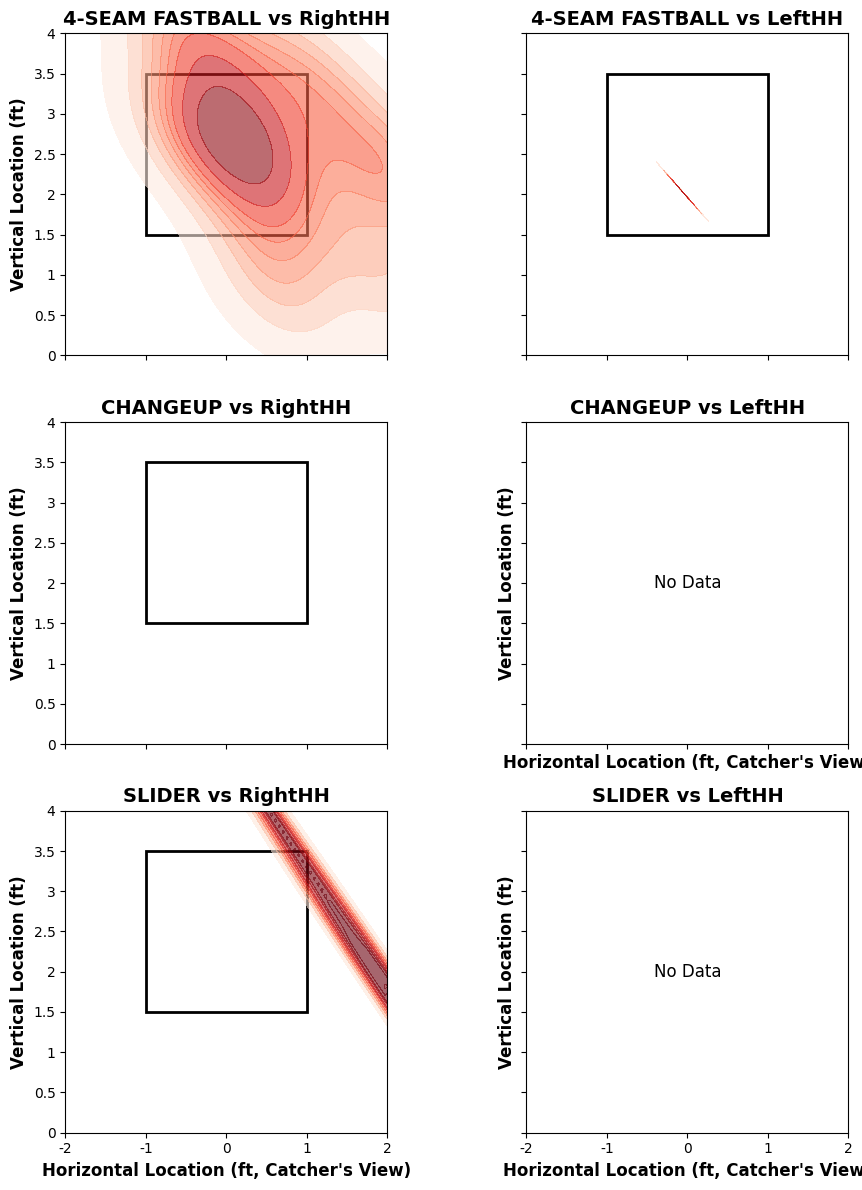

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import FuncFormatter

def strike_zone_heatmap(df: pd.DataFrame, pitcher_name: str, save_path: str = None):
    # Rename columns for consistency
    df = df.rename(columns={
        'HorzBreak': 'pfx_x',
        'InducedVertBreak': 'pfx_z',
        'TaggedPitchType': 'pitch_type',
        'PitcherThrows': 'p_throws',
        'PlateLocSide': 'plate_x',
        'PlateLocHeight': 'plate_z',
        'BatterSide': 'batter_side'
    })

    # Pitch type mapping
    pitch_mapping = {
        'Fastball': '4-SEAM FASTBALL',
        'Sinker': 'SINKER',
        'Curveball': 'CURVEBALL',
        'Changeup': 'CHANGEUP',
        'Sweeper': 'SWEEPER',
        'Slider': 'SLIDER',
        'Cutter': 'CUTTER',
        'Splitter': 'SPLITTER',
        'Undefined': 'UNKNOWN'
    }
    df['pitch_type'] = df['pitch_type'].fillna('UNKNOWN').astype(str).map(pitch_mapping).fillna('UNKNOWN')

    # Color dictionary for pitch types
    dict_colour = {
        '4-SEAM FASTBALL': 'pink',
        'SINKER': 'purple',
        'CURVEBALL': 'blue',
        'CHANGEUP': 'orange',
        'SWEEPER': 'red',
        'SLIDER': 'green',
        'CUTTER': 'yellow',
        'SPLITTER': 'black',
        'UNKNOWN': 'gray'
    }

    # Check for missing pitch types
    missing_pitches = set(df['pitch_type']) - set(dict_colour.keys())
    if missing_pitches:
        raise ValueError(f"The palette dictionary is missing keys: {missing_pitches}")

    # Font properties
    font_properties_titles = {'fontsize': 14, 'weight': 'bold'}
    font_properties_axes = {'fontsize': 12, 'weight': 'bold'}

    # Filter by pitcher
    df_pitcher = df[df['Pitcher'] == pitcher_name]

    # Get unique pitch types
    pitch_types = sorted(df_pitcher['pitch_type'].unique())
    batter_sides = ['Right', 'Left']  # R for RHH, L for LHH

    # Calculate number of rows needed (2 columns: RHH and LHH)
    n_rows = len(pitch_types)
    fig, axes = plt.subplots(n_rows, 2, figsize=(10, 4 * n_rows), sharex=True, sharey=True)

    # Ensure axes is 2D array even for single pitch type
    if n_rows == 1:
        axes = [axes]

    for i, pitch_type in enumerate(pitch_types):
        for j, side in enumerate(batter_sides):
            ax = axes[i][j] if n_rows > 1 else axes[j]
            # Filter data for pitcher, pitch type, and batter side
            df_subset = df_pitcher[(df_pitcher['pitch_type'] == pitch_type) & (df_pitcher['batter_side'] == side)]

            if not df_subset.empty:
                # Create heatmap using KDE
                sns.kdeplot(
                    data=df_subset,
                    x='plate_x',
                    y='plate_z',
                    ax=ax,
                    cmap='Reds',
                    fill=True,
                    alpha=0.6,
                    zorder=2
                )

                # Add strike zone
                strike_zone = Rectangle((-1, 1.5), 2, 2.0, fill=False, edgecolor='black', linewidth=2, zorder=1)
                ax.add_patch(strike_zone)

                # Set labels and title
                ax.set_xlabel('Horizontal Location (ft, Catcher\'s View)', fontdict=font_properties_axes)
                ax.set_ylabel('Vertical Location (ft)', fontdict=font_properties_axes)
                title = f"{pitch_type} vs {side}HH"
                ax.set_title(title, fontdict=font_properties_titles)

                # Set limits and aspect
                ax.set_xlim(-2, 2)
                ax.set_ylim(0, 4)
                ax.set_aspect('equal', adjustable='box')

                # Format ticks
                ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x) if x.is_integer() else x))
                ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x) if x.is_integer() else x))
            else:
                # If no data, clear plot and add note
                ax.text(0, 2, 'No Data', ha='center', va='center', fontsize=12)
                ax.set_xlim(-2, 2)
                ax.set_ylim(0, 4)
                ax.set_aspect('equal', adjustable='box')
                ax.set_xlabel('Horizontal Location (ft, Catcher\'s View)', fontdict=font_properties_axes)
                ax.set_ylabel('Vertical Location (ft)', fontdict=font_properties_axes)
                ax.set_title(f"{pitch_type} vs {side}HH", fontdict=font_properties_titles)

    # Adjust layout
    plt.tight_layout()

    # Save or show plot
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


df = pd.read_csv('Data/BeltersDans6-1.csv')
strike_zone_heatmap(df, pitcher_name="Eli Tritinger", save_path='heatmap/Tritinger.png')

In [17]:
df['Date'][0]

'06/01/2025'